# Classification for Stunting Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


## Load Dataset

In [4]:
df = pd.read_csv("/home/rmfarizky/Project/deteksi_stunting/Dataset/dataset.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   j_kel             624 non-null    int64  
 1   usia_ukur(bulan)  624 non-null    int64  
 2   berat             624 non-null    float64
 3   tinggi            624 non-null    float64
 4   Z_BB/TB           624 non-null    float64
 5   Z_BB/U            624 non-null    float64
 6   Z_TB/U            624 non-null    float64
 7   Z_IMT/U           624 non-null    float64
 8   BB/TB             624 non-null    object 
 9   BB/U              624 non-null    object 
 10  TB/U              624 non-null    object 
 11  IMT/U             624 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 58.6+ KB


In [6]:
df.columns

Index(['j_kel', 'usia_ukur(bulan)', 'berat', 'tinggi', 'Z_BB/TB', 'Z_BB/U',
       'Z_TB/U', 'Z_IMT/U', 'BB/TB', 'BB/U', 'TB/U', 'IMT/U'],
      dtype='object')

In [7]:
df.head()

,j_kel,usia_ukur(bulan),berat,tinggi,Z_BB/TB,Z_BB/U,Z_TB/U,Z_IMT/U,BB/TB,BB/U,TB/U,IMT/U
0,0,58,13.1,97.5,-0.53,0.52,1.24,-0.22,Gizi Baik,Normal,Normal,Gizi Baik
1,1,57,12.2,98.5,-1.87,-1.94,-0.89,-1.95,Gizi Baik,Normal,Normal,Gizi Baik
2,1,56,12.6,95.5,-0.95,-1.43,-1.15,-1.05,Gizi Baik,Normal,Normal,Gizi Baik
3,0,55,14.2,99.3,-0.40,-1.42,-1.96,-0.36,Gizi Baik,Normal,Normal,Gizi Baik
4,1,53,13.2,97.0,-0.97,-1.38,-1.18,-0.96,Gizi Baik,Normal,Normal,Gizi Baik


# Working on IMT/U

In this classification task, our focus will be on  `IMT/U` category, which contains six labels:

0. Gizi Baik
1. Gizi Buruk
2. Gizi Kurang
3. Gizi Lebih
4. Obesitas
5. Resiko Gizi Lebih

In [8]:
df[df.columns[-1]].unique()

array(['Gizi Baik', 'Gizi Kurang', 'Resiko Gizi Lebih', 'Gizi Buruk',
       'Gizi Lebih', 'Obesitas'], dtype=object)

## Define the DataFrame

In [9]:
features = ['j_kel', 'usia_ukur(bulan)', 'berat', 'tinggi','Z_BB/TB', 'Z_BB/U','Z_TB/U', 'Z_IMT/U']
target = ['BB/TB', 'BB/U', 'TB/U', 'IMT/U']

In [10]:
df_IMT = df[df.columns[:4].tolist() + [df.columns[7]]+ [df.columns[-1]]]
df_IMT

,j_kel,usia_ukur(bulan),berat,tinggi,Z_IMT/U,IMT/U
0,0,58,13.1,97.5,-0.22,Gizi Baik
1,1,57,12.2,98.5,-1.95,Gizi Baik
2,1,56,12.6,95.5,-1.05,Gizi Baik
3,0,55,14.2,99.3,-0.36,Gizi Baik
4,1,53,13.2,97.0,-0.96,Gizi Baik
...,...,...,...,...,...,...
619,1,9,7.0,67.5,-0.68,Gizi Baik
620,0,9,7.6,67.5,-1.06,Gizi Baik
621,1,7,6.5,65.0,-2.12,Gizi Kurang
622,1,7,6.1,65.5,-1.18,Gizi Baik


In [11]:
# # df_IMT = df_IMT[['j_kel', 'usia_ukur(bulan)', 'berat', 'tinggi','IMT/U']]
# df_IMT

## Split Dataset

In [12]:
X = df_IMT[df_IMT.columns[:5]]
y = df_IMT[df_IMT.columns[5]]
X, y = np.array(X), np.array(y)
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Naive Bayes

In [13]:
# Inisialisasi dan melatih model Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
naive_bayes_predictions = naive_bayes_model.predict(X_test)

# Menghitung akurasi
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
print("Akurasi Naive Bayes:", naive_bayes_accuracy)

Akurasi Naive Bayes: 0.9166666666666666


In [14]:
# confusion_matrix(y_test, naive_bayes_predictions)

In [15]:
print(classification_report(y_test, naive_bayes_predictions))

                   precision    recall  f1-score   support

        Gizi Baik       0.91      1.00      0.95       129
       Gizi Buruk       1.00      0.50      0.67         2
      Gizi Kurang       1.00      0.23      0.38        13
       Gizi Lebih       1.00      1.00      1.00         2
Resiko Gizi Lebih       1.00      0.80      0.89        10

         accuracy                           0.92       156
        macro avg       0.98      0.71      0.78       156
     weighted avg       0.92      0.92      0.90       156



## Decision Tree

In [16]:
# Inisialisasi model Decision Tree Classifier
dct_model = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data latih
dct_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
dct_predictions = dct_model.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, dct_predictions)
print("Accuracy Decision Tree:", accuracy)

Accuracy Decision Tree: 1.0


In [17]:
print(classification_report(y_test, dct_predictions))

                   precision    recall  f1-score   support

        Gizi Baik       1.00      1.00      1.00       129
       Gizi Buruk       1.00      1.00      1.00         2
      Gizi Kurang       1.00      1.00      1.00        13
       Gizi Lebih       1.00      1.00      1.00         2
Resiko Gizi Lebih       1.00      1.00      1.00        10

         accuracy                           1.00       156
        macro avg       1.00      1.00      1.00       156
     weighted avg       1.00      1.00      1.00       156



## Random Forest SKLearn

In [18]:
# creating a RF classifier 
rf_model = RandomForestClassifier(n_estimators = 300)   
  
# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
rf_model.fit(X_train, y_train) 
  
# performing predictions on the test dataset 
rf_predictions = rf_model.predict(X_test) 
    
# using metrics module for accuracy calculation 
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, rf_predictions))

ACCURACY OF THE MODEL:  0.9871794871794872


In [19]:
print(classification_report(y_test, rf_predictions))

                   precision    recall  f1-score   support

        Gizi Baik       1.00      1.00      1.00       129
       Gizi Buruk       0.00      0.00      0.00         2
      Gizi Kurang       0.87      1.00      0.93        13
       Gizi Lebih       1.00      1.00      1.00         2
Resiko Gizi Lebih       1.00      1.00      1.00        10

         accuracy                           0.99       156
        macro avg       0.77      0.80      0.79       156
     weighted avg       0.98      0.99      0.98       156



/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

## Decision Forest TensorFlow

In [65]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf

In [50]:
# df_IMT = df_IMT.drop(columns='Z_IMT/U')
df_IMT

,j_kel,usia_ukur(bulan),berat,tinggi,Z_IMT/U,IMT/U
0,0,58,13.1,97.5,-0.22,0
1,1,57,12.2,98.5,-1.95,0
2,1,56,12.6,95.5,-1.05,0
3,0,55,14.2,99.3,-0.36,0
4,1,53,13.2,97.0,-0.96,0
...,...,...,...,...,...,...
619,1,9,7.0,67.5,-0.68,0
620,0,9,7.6,67.5,-1.06,0
621,1,7,6.5,65.0,-2.12,1
622,1,7,6.1,65.5,-1.18,0


In [51]:
label = "IMT/U"

classes = df_IMT[label].unique().tolist()
print(f"Label classes: {classes}")

df_IMT[label] = df_IMT[label].map(classes.index)

Label classes: [0, 1, 2, 3, 4, 5]


/tmp/ipykernel_1410/1580051381.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IMT[label] = df_IMT[label].map(classes.index)


In [52]:
def split_dataset(dataset, test_ratio=0.3):
  #Splits a panda dataframe in two
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds, test_ds = split_dataset(df_IMT)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds), len(test_ds)))

430 examples in training, 194 examples for testing.


In [53]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds, label=label)

In [54]:
# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)

Use 8 thread(s) for training
Use /tmp/tmpyoe17yze as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'j_kel': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'usia_ukur(bulan)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'berat': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'tinggi': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'Z_IMT/U': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'j_kel': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'usia_ukur(bulan)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'berat': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'tinggi': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'C

[INFO 23-10-10 04:29:26.7627 WITA kernel.cc:773] Start Yggdrasil model training
[INFO 23-10-10 04:29:26.7628 WITA kernel.cc:774] Collect training examples
[INFO 23-10-10 04:29:26.7628 WITA kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-10-10 04:29:26.7630 WITA kernel.cc:393] Number of batches: 1
[INFO 23-10-10 04:29:26.7630 WITA kernel.cc:394] Number of examples: 430
[INFO 23-10-10 04:29:26.7630 WITA kernel.cc:794] Training dataset:
Number of records: 430
Number of columns: 6

Number of columns by type:
	NUMERICAL: 5 (83.3333%)
	CATEGORICAL: 1 (16.6667%)

Columns:

NUMERICAL: 5 (83.3333%)
	0: "Z_IMT/U" NUMERICAL mean:-0.683814 min:-3.55 max:3.

Model trained in 0:00:00.088666
Compiling model...
Model compiled.


In [55]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

1/1 [==============================] - 1s 531ms/step - loss: 0.0000e+00 - accuracy: 0.9897



In [56]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

In [57]:
model_1.summary()

Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (5):
	Z_IMT/U
	berat
	j_kel
	tinggi
	usia_ukur(bulan)

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.          "Z_IMT/U"  0.786059 ################
    2.           "tinggi"  0.303915 #
    3.            "berat"  0.299218 #
    4. "usia_ukur(bulan)"  0.280034 
    5.            "j_kel"  0.262709 

Variable Importance: NUM_AS_ROOT:
    1.          "Z_IMT/U" 235.000000 ################
    2.           "tinggi" 29.000000 #
    3.            "berat" 20.000000 #
    4. "usia_ukur(bulan)" 13.000000 
    5.            "j_kel"  3.000000 

Variable Importance: NUM_NODES:
    1.          

In [58]:
model_1.make_inspector().evaluation()

Evaluation(num_examples=430, accuracy=0.9813953488372092, loss=0.05426641679802086, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

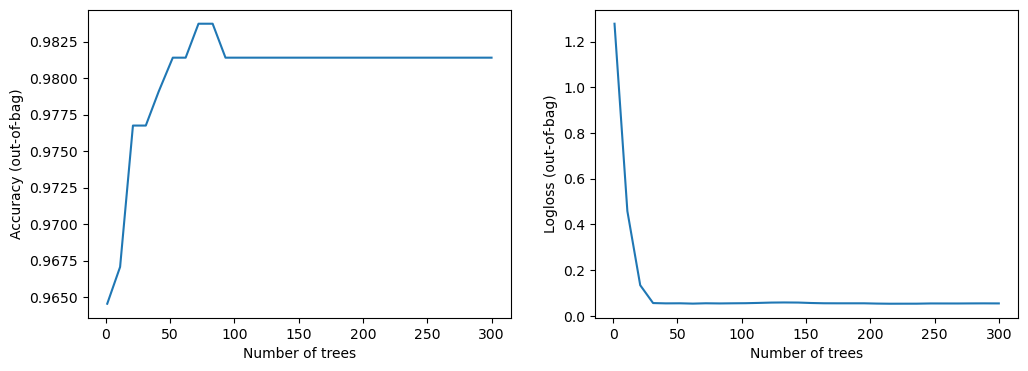

In [59]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [ ]:
print(classification_report(y_test, rf_predictions))naive_bayes_model.predict(stunt)

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


array(['Gizi Kurang', 'Gizi Kurang', 'Gizi Kurang'], dtype='<U17')

In [ ]:
# %load_ext tensorboard
# # rm -fr "/tmp/tensorboard_logs"
# # model_1.make_inspector().export_to_tensorboard("/tmp/tensorboard_logs")
# # %tensorboard --logdir "/tmp/tensorboard_logs"

# Using 4 fitur and Z-Score Normalization

In [ ]:
df2 = pd.read_csv('/home/rmfarizky/Project/deteksi_stunting/Dataset/dataset.csv')

In [ ]:
from scipy import stats

In [ ]:
df2['usia_ukur(bulan)'] = df2['usia_ukur(bulan)'].astype(float)

In [ ]:
df2

,j_kel,usia_ukur(bulan),berat,tinggi,Z_BB/TB,Z_BB/U,Z_TB/U,Z_IMT/U,BB/TB,BB/U,TB/U,IMT/U
0,0,58.0,13.1,97.5,-0.53,0.52,1.24,-0.22,Gizi Baik,Normal,Normal,Gizi Baik
1,1,57.0,12.2,98.5,-1.87,-1.94,-0.89,-1.95,Gizi Baik,Normal,Normal,Gizi Baik
2,1,56.0,12.6,95.5,-0.95,-1.43,-1.15,-1.05,Gizi Baik,Normal,Normal,Gizi Baik
3,0,55.0,14.2,99.3,-0.40,-1.42,-1.96,-0.36,Gizi Baik,Normal,Normal,Gizi Baik
4,1,53.0,13.2,97.0,-0.97,-1.38,-1.18,-0.96,Gizi Baik,Normal,Normal,Gizi Baik
...,...,...,...,...,...,...,...,...,...,...,...,...
619,1,9.0,7.0,67.5,-0.81,-1.59,-1.75,-0.68,Gizi Baik,Normal,Normal,Gizi Baik
620,0,9.0,7.6,67.5,-1.21,-2.38,-2.52,-1.06,Gizi Baik,Kurang,Pendek,Gizi Baik
621,1,7.0,6.5,65.0,-2.22,-2.69,-1.97,-2.12,Gizi Kurang,Kurang,Normal,Gizi Kurang
622,1,7.0,6.1,65.5,-1.43,-2.41,-2.46,-1.18,Gizi Baik,Kurang,Pendek,Gizi Baik


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   j_kel             624 non-null    int64  
 1   usia_ukur(bulan)  624 non-null    float64
 2   berat             624 non-null    float64
 3   tinggi            624 non-null    float64
 4   Z_BB/TB           624 non-null    float64
 5   Z_BB/U            624 non-null    float64
 6   Z_TB/U            624 non-null    float64
 7   Z_IMT/U           624 non-null    float64
 8   BB/TB             624 non-null    object 
 9   BB/U              624 non-null    object 
 10  TB/U              624 non-null    object 
 11  IMT/U             624 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 58.6+ KB


In [ ]:
df2['berat'] = stats.zscore(df[df.columns[2]], axis=None)
df2['tinggi'] = stats.zscore(df[df.columns[3]], axis=None)

In [ ]:
X = df2[df2.columns[:4]]
y = df2[df2.columns[-1]]
X, y = np.array(X), np.array(y)
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# creating a RF classifier 
rf_model = RandomForestClassifier(n_estimators = 300)   
  
# Training the model on the training dataset 
# fit function is used to train the model using the training sets as parameters 
rf_model.fit(X_train, y_train) 
  
# performing predictions on the test dataset 
rf_predictions = rf_model.predict(X_test) 
    
# using metrics module for accuracy calculation 
print("ACCURACY Random Forest: ", accuracy_score(y_test, rf_predictions))

ACCURACY Random Forest:  0.792


In [ ]:
# Inisialisasi model Decision Tree Classifier
dct_model = DecisionTreeClassifier(random_state=42)

# Melatih model dengan data latih
dct_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
dct_predictions = dct_model.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, dct_predictions)
print("Accuracy Decision Tree:", accuracy)

Accuracy Decision Tree: 0.696


In [ ]:
# Inisialisasi dan melatih model Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
naive_bayes_predictions = naive_bayes_model.predict(X_test)

# Menghitung akurasi
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
print("Accuracy Naive Bayes:", naive_bayes_accuracy)

Accuracy Naive Bayes: 0.704
